<a href="https://colab.research.google.com/github/Nour543/NLP-Project/blob/main/My_NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Libraries
import numpy as np
import pandas as pd
import sklearn
import nltk

#from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

#nltk.download('vader_lexicon')

In [4]:
# Import data
# 
df = pd.read_csv('/content/drive/MyDrive/ask_fm_data.csv', delimiter=',') 
df.head()

,Unnamed: 0,q_a,label
0,0,how to tell if a guy is gay if they seem super...,0
1,1,Idk I'm not gay,0
2,2,This person is 100% fake so beware Isabella!,1
3,3,Oof lmao how is she fake? Who's this lmao shit...,1
4,4,If your loved one left n cut all ties w you sh...,0


In [183]:
new = pd.read_csv('/content/drive/MyDrive/labeled_data.csv', delimiter=',') 
new.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
# check if there are blank elements
df.isnull().sum()

Unnamed: 0    0
q_a           0
label         0
dtype: int64

1. Use any of the hate speech/cyberbullying databases maintained at http://hatespeechdata.com/. In addition, there is two additional cyberbullying datasets available at https://github.com/saroarjahan/Negation_project/, AskFm and FormSpring, which can be used as well. We would like to investigate the structure of the dataset in terms of the categories present. Consider the subclass S1 of hate/cyberbullying content and subclass S2 of non-abusive content. Draw a word-cloud representation of S1 and S2 and explain the word features.

In [6]:
df['label'].value_counts()

0    8789
1    1209
Name: label, dtype: int64

In [7]:
# Making subclasses S1: abusive content (label = 1), S2: non abusive content(label = 0)
S1 = df[df['label']==1]
S2 = df[df['label']==0]

In [8]:
#S1.head()
#S2.head()

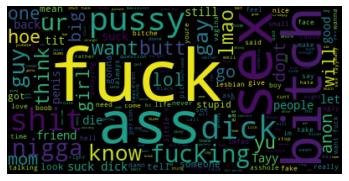

In [9]:
# Wordcloud 1: abusive
text_S1 = " ".join(t for t in S1.q_a)
wordcloud = WordCloud().generate(text_S1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

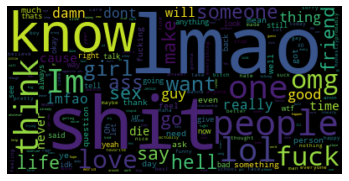

In [10]:
# Wordcloud 2: non abusive
text_S2 = " ".join(t for t in S2.q_a)
wordcloud = WordCloud().generate(text_S2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
# split into training/ test data
from sklearn.model_selection import train_test_split

In [12]:
#X: Feature data
X = df['q_a']

#y: label
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Pipeline: TF-IDF Vectorizer + LR Classifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),
])

#X_train = df_train['q_a_processed']
text_clf.fit(X_train, y_train)

# Form a prediction set
predictions = text_clf.predict(X_test)

# Report the confusion matrix
from sklearn import metrics
print("Confusion Matrix:  \n", metrics.confusion_matrix(y_test,predictions))

# Print a classification report
print("Classification Report:  \n", metrics.classification_report(y_test,predictions))

#Accuracy Score
print("Accuracy Score:  " , metrics.accuracy_score(y_test, predictions))

# F1 Score
print("F1 Score:  ", metrics.f1_score(y_test, predictions))

Confusion Matrix:  
 [[2612   17]
 [ 268  103]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      2629
           1       0.86      0.28      0.42       371

    accuracy                           0.91      3000
   macro avg       0.88      0.64      0.68      3000
weighted avg       0.90      0.91      0.88      3000

Accuracy Score:   0.905
F1 Score:   0.41955193482688397


2.a. Perform dataset pre-processing examples stop-word removal, stemming, special character removal, emoji removal, number, hashtag, mention tag, etc. Report different preprocessing outcome and try to explain the results. 

In [14]:
df_train = pd.DataFrame(list(zip(X_train, y_train)), columns =['q_a', 'label'])

In [93]:
df_train['label'].value_counts()

0    6160
1     838
Name: label, dtype: int64

In [16]:
# remove mention urls, tags and hashtags
df_train['q_a_processed']=df_train['q_a'].replace('@[A-Za-z0-9]+, #[A-Za-z0-9_]+, http\S+|www.\S+','', regex=True)

In [17]:
df_train['q_a_processed'].str.lower()

0       i'm not talking about just cheating. you can b...
1                                                 wtf oml
2       i honestly wouldn't care. it's the truth. actu...
3              but im not even in a relationship lmao wyd
4              do you like movies about ufos and aliens? 
                              ...                        
6993    you know you really shouldn't talk that way to...
6994             im tall as hell so im here for tall men.
6995                  you really had sex with yaras bf ? 
6996          if you could teleport, where would you go? 
6997                          who do you think you are?  
Name: q_a_processed, Length: 6998, dtype: object

In [18]:
def remove_whitespace(text):
    return  " ".join(text.split())

df_train['q_a_processed'] = df_train['q_a_processed'].apply(remove_whitespace)

In [19]:
from nltk import word_tokenize
nltk.download('punkt')

df_train['q_a_processed'] = df_train['q_a_processed'].apply(lambda X: word_tokenize(X))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [20]:
# OPTIONAL, TAKES A FEW MINS #########################
!pip install spellchecker
!pip install pyspellchecker

from spellchecker import SpellChecker

def spell_check(text):
    
    result = []
    spell = SpellChecker()
    for word in text:
        correct_word = spell.correction(word)
        result.append(correct_word)
    
    return result

df_train['q_a_processed'] = df_train['q_a_processed'].apply(spell_check)

In [22]:
nltk.download('stopwords')

from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')
en_stopwords.remove('not')

def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)
            
    return result

df_train['q_a_processed'] = df_train['q_a_processed'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
from nltk.stem import PorterStemmer

def stemming(text):
    porter = PorterStemmer()
    
    result=[]
    for word in text:
        result.append(porter.stem(word))
    return result

df_train['q_a_processed'] = df_train['q_a_processed'].apply(stemming)

In [24]:
# remove special characters and numbers
from nltk.tokenize import RegexpTokenizer

def remove_punct(text):
    
    tokenizer = RegexpTokenizer(r"\w+")
    lst=tokenizer.tokenize(' '.join(text))
    return lst

df_train['q_a_processed'] = df_train['q_a_processed'].apply(remove_punct)

In [25]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

df_train['q_a_processed'] = df_train['q_a_processed'].apply(lambda X: TreebankWordDetokenizer().detokenize(X))

#TreebankWordDetokenizer().detokenize(df_train['q_a_processed'])

In [26]:
df_train['q_a_processed'].head(10)

0    not talk cheat disloy person mani way not chea...
1                                              wif oil
2    I honestli would not care It truth actual not ...
3                     im not even relationship lao wed
4                               Do like movi ufo alien
5                             If boyfriend demon could
6                        shove rude ass dumb ass bitch
7                                                  whi
8                            lol not know song kid wif
9          Do agre keep friend close enemi even closer
Name: q_a_processed, dtype: object

2.b. Use simple LR classifier and tf-idf as feature representation for different pre-processing performance comparisons. Use best pre-processing for rest of the  experiments.

In [27]:
# Pipeline: TF-IDF Vectorizer + LR Classifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),
])

X_train = df_train['q_a_processed']
text_clf.fit(X_train, y_train)

# Form a prediction set
predictions = text_clf.predict(X_test)

# Report the confusion matrix
from sklearn import metrics
print("Confusion Matrix:  \n", metrics.confusion_matrix(y_test,predictions))

# Print a classification report
print("Classification Report:  \n", metrics.classification_report(y_test,predictions))

#Accuracy Score
print("Accuracy Score:  " , metrics.accuracy_score(y_test, predictions))

# F1 Score
print("F1 Score:  ", metrics.f1_score(y_test, predictions))

Confusion Matrix:  
 [[2613   16]
 [ 317   54]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      2629
           1       0.77      0.15      0.24       371

    accuracy                           0.89      3000
   macro avg       0.83      0.57      0.59      3000
weighted avg       0.88      0.89      0.85      3000

Accuracy Score:   0.889
F1 Score:   0.24489795918367352


3. Perform Sentiment analysis of each of the posts and get positive, negative, or neutral scores. You can use sentiment Vader (https://github.com/cjhutto/vaderSentiment). Use this sentiment score as a feature and report classification Accuracy and F1 score by using simple Logistic Regression as classifier and sentiment score as a feature. Dou you think sentiment analysis can be used as feature? 

In [31]:
# VADER, raw data + evaluation
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
sid = SentimentIntensityAnalyzer()
   
df_train['scores'] = df_train['q_a'].apply(lambda t: sid.polarity_scores(t))

df_train['compound']  = df_train['scores'].apply(lambda score_dict: score_dict['compound'])

df_train['comp_score'] = df_train['compound'].apply(lambda c: 0 if c >=0 else 1)

#df_train.head(10) 


print("Confusion Matrix:  \n", metrics.confusion_matrix(df_train['label'],df_train['comp_score']))

# Print a classification report
print("Classification Report:  \n", metrics.classification_report(df_train['label'],df_train['comp_score']))

#Accuracy Score
print("Accuracy Score:  " , metrics.accuracy_score(df_train['label'],df_train['comp_score']))

# F1 Score
print("F1 Score:  ", metrics.f1_score(df_train['label'],df_train['comp_score']))

     |████████████████████████████████| 125 kB 5.3 MB/s 
Confusion Matrix:  
 [[3998 2162]
 [ 362  476]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.92      0.65      0.76      6160
           1       0.18      0.57      0.27       838

    accuracy                           0.64      6998
   macro avg       0.55      0.61      0.52      6998
weighted avg       0.83      0.64      0.70      6998

Accuracy Score:   0.6393255215775936
F1 Score:   0.2738780207134638


In [32]:
# VADER, pre processed data
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
sid = SentimentIntensityAnalyzer()
   
df_train['scores'] = df_train['q_a_processed'].apply(lambda t: sid.polarity_scores(t))

df_train['compound']  = df_train['scores'].apply(lambda score_dict: score_dict['compound'])

df_train['comp_score'] = df_train['compound'].apply(lambda c: 0 if c >=0 else 1)

#df_train.head(10)   

print("Confusion Matrix:  \n", metrics.confusion_matrix(df_train['label'],df_train['comp_score']))

# Print a classification report
print("Classification Report:  \n", metrics.classification_report(df_train['label'],df_train['comp_score']))

#Accuracy Score
print("Accuracy Score:  " , metrics.accuracy_score(df_train['label'],df_train['comp_score']))

# F1 Score
print("F1 Score:  ", metrics.f1_score(df_train['label'],df_train['comp_score']))

Confusion Matrix:  
 [[4141 2019]
 [ 378  460]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.92      0.67      0.78      6160
           1       0.19      0.55      0.28       838

    accuracy                           0.66      6998
   macro avg       0.55      0.61      0.53      6998
weighted avg       0.83      0.66      0.72      6998

Accuracy Score:   0.657473563875393
F1 Score:   0.27735905939101596


4. Run classification with LR and tf-itdf as a baseline model so that you can compare the result with other state-of-the-art practices. Study the implementation available at https://github.com/pinkeshbadjatiya/twitter-hatespeech of the paper "Deep learning for hate speech detection Tweets" by Pinkesh Badjatiya (www'17 proceedings, 2017) report result of the Accuracy and F1 score. Try to implement CNN+fastText architecture.

In [37]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [131]:
#Imbalanced data: Resample
from sklearn.utils import resample

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = df_train['q_a_processed'] 

Offensive = df_train[df_train['label']==1]
Okay = df_train[df_train['label']==0]

Off_upsampled = resample(Offensive,
               replace=True,
               n_samples=len(Okay),
               random_state=42)

upsampled = pd.concat([Okay, Off_upsampled])
X_train = upsampled['q_a_processed'] 
y_train = upsampled['label'] 

In [132]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

x_train = tokenizer.texts_to_sequences(X_train) # encoding
x_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

In [134]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
4873    1
6262    1
4405    1
3878    1
3151    1
Name: label, Length: 12320, dtype: int64

In [135]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 300

X_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

In [140]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #trying 2 instead of 1
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 300, 50)           257550    
_________________________________________________________________
flatten_9 (Flatten)          (None, 15000)             0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)                150010    
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 11        
Total params: 407,571
Trainable params: 407,571
Non-trainable params: 0
_________________________________________________________________


In [170]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=2,
                    #class_weight= class_weight,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=2)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/50
1232/1232 - 9s - loss: 0.0087 - accuracy: 0.9976 - val_loss: 1.2828 - val_accuracy: 0.8833
Epoch 2/50
1232/1232 - 9s - loss: 0.0089 - accuracy: 0.9971 - val_loss: 1.2824 - val_accuracy: 0.8773
Epoch 3/50
1232/1232 - 9s - loss: 0.0088 - accuracy: 0.9970 - val_loss: 1.2717 - val_accuracy: 0.8747
Epoch 4/50
1232/1232 - 8s - loss: 0.0087 - accuracy: 0.9970 - val_loss: 1.3546 - val_accuracy: 0.8787
Epoch 5/50
1232/1232 - 8s - loss: 0.0089 - accuracy: 0.9968 - val_loss: 1.3327 - val_accuracy: 0.8707
Epoch 6/50
1232/1232 - 9s - loss: 0.0081 - accuracy: 0.9970 - val_loss: 1.2474 - val_accuracy: 0.8610
Epoch 7/50
1232/1232 - 9s - loss: 0.0075 - accuracy: 0.9972 - val_loss: 1.3473 - val_accuracy: 0.8673
Epoch 8/50
1232/1232 - 9s - loss: 0.0066 - accuracy: 0.9976 - val_loss: 1.5466 - val_accuracy: 0.8703
Epoch 9/50
1232/1232 - 8s - loss: 0.0065 - accuracy: 0.9980 - val_loss: 1.6055 - val_accuracy: 0.8767
Epoch 10/50
1232/1232 - 8s - loss: 0.0073 - accuracy: 0.9974 - val_loss: 1.7509 - 

In [180]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print('Precision = ', precision_score(y_test, y_pred , average="macro"))
print('Recall = ', recall_score(y_test, y_pred , average="macro"))
print('F1 Score = ', f1_score(y_test, y_pred , average="macro"))

Precision =  0.43816666666666665
Recall =  0.5
F1 Score =  0.46704565642209983


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [179]:
# q = np.array(y_train)
# print(q[-1])
# print(y_pred[-1])
y_test

4122    0
4065    0
1731    0
4740    0
6391    0
       ..
5580    0
1074    0
3063    0
4554    0
3616    1
Name: label, Length: 3000, dtype: int64

In [83]:
# MODEL 2
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 300, 50)           257550    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 258,071
Trainable params: 258,071
Non-trainable params: 0
_________________________________________________________________


In [84]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    class_weight= class_weight,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=2)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Testing Accuracy:  {:.4f}".format(accuracy))
#plot_history(history)

Training Accuracy: 0.9986
Testing Accuracy:  0.8733


In [86]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
#print('Precision = ', precision_score(y_test, y_pred , average="macro"))
print('Recall = ', recall_score(y_test, y_pred , average="macro"))
print('F1 Score = ', f1_score(y_test, y_pred , average="macro"))

Recall =  0.5
F1 Score =  0.46704565642209983


In [87]:
set(y_test) - set(y_pred)

{1}

In [60]:
# CNN

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 100)          515100    
_________________________________________________________________
conv1d (Conv1D)              (None, 296, 128)          64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 580,529
Trainable params: 580,529
Non-trainable params: 0
_________________________________________________________________


In [61]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=2)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9980
Testing Accuracy:  0.8787


In [62]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print('Precision = ', precision_score(y_test, y_pred , average="macro"))
print('Recall = ', recall_score(y_test, y_pred , average="macro"))
print('F1 Score = ', f1_score(y_test, y_pred , average="macro"))

Precision =  0.43816666666666665
Recall =  0.5
F1 Score =  0.46704565642209983


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
# # Metrics for the model
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import cohen_kappa_score
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import confusion_matrix

# # predict probabilities for test set
# yhat_probs = model.predict(X_test, verbose=2)
# # predict crisp classes for test set
# yhat_classes = model.predict_classes(X_test, verbose=2)

# # reduce to 1d array
# yhat_probs = yhat_probs[:, 0]
# yhat_classes = yhat_classes[:, 0]

# # accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(y_test, yhat_classes)
# print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
# precision = precision_score(y_test, yhat_classes)
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(y_test, yhat_classes)
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(y_test, yhat_classes)
# print('F1 score: %f' % f1)

In [64]:
####################### FastText #######################

In [65]:
from __future__ import print_function
import numpy as np

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import GlobalAveragePooling1D
from keras.datasets import imdb


def create_ngram_set(input_list, ngram_value=2):
    """
    Extract a set of n-grams from a list of integers.

    >>> create_ngram_set([1, 4, 9, 4, 1, 4], ngram_value=2)
    {(4, 9), (4, 1), (1, 4), (9, 4)}

    >>> create_ngram_set([1, 4, 9, 4, 1, 4], ngram_value=3)
    [(1, 4, 9), (4, 9, 4), (9, 4, 1), (4, 1, 4)]
    """
    return set(zip(*[input_list[i:] for i in range(ngram_value)]))


def add_ngram(sequences, token_indice, ngram_range=2):
    """
    Augment the input list of list (sequences) by appending n-grams values.

    Example: adding bi-gram
    >>> sequences = [[1, 3, 4, 5], [1, 3, 7, 9, 2]]
    >>> token_indice = {(1, 3): 1337, (9, 2): 42, (4, 5): 2017}
    >>> add_ngram(sequences, token_indice, ngram_range=2)
    [[1, 3, 4, 5, 1337, 2017], [1, 3, 7, 9, 2, 1337, 42]]

    Example: adding tri-gram
    >>> sequences = [[1, 3, 4, 5], [1, 3, 7, 9, 2]]
    >>> token_indice = {(1, 3): 1337, (9, 2): 42, (4, 5): 2017, (7, 9, 2): 2018}
    >>> add_ngram(sequences, token_indice, ngram_range=3)
    [[1, 3, 4, 5, 1337, 2017], [1, 3, 7, 9, 2, 1337, 42, 2018]]
    """
    new_sequences = []
    for input_list in sequences:
        new_list = input_list[:]
        for ngram_value in range(2, ngram_range + 1):
            for i in range(len(new_list) - ngram_value + 1):
                ngram = tuple(new_list[i:i + ngram_value])
                if ngram in token_indice:
                    new_list.append(token_indice[ngram])
        new_sequences.append(new_list)

    return new_sequences

# Set parameters:
# ngram_range = 2 will add bi-grams features
ngram_range = 2
max_features = 20000
maxlen = 400
batch_size = 32
embedding_dims = 50
epochs = 5

In [66]:
if ngram_range > 1:
    print('Adding {}-gram features'.format(ngram_range))
    # Create set of unique n-gram from the training set.
    ngram_set = set()
    
    xtrain_lst =  X_train.tolist()
    xtest_lst =  X_test.tolist()
    
    for input_list in xtrain_lst:
        for i in range(2, ngram_range + 1):
            set_of_ngram = create_ngram_set(input_list, ngram_value=i)
            ngram_set.update(set_of_ngram)

    # Dictionary mapping n-gram token to a unique integer.
    # Integer values are greater than max_features in order
    # to avoid collision with existing features.
    start_index = max_features + 1
    token_indice = {v: k + start_index for k, v in enumerate(ngram_set)}
    indice_token = {token_indice[k]: k for k in token_indice}

    # max_features is the highest integer that could be found in the dataset.
    max_features = np.max(list(indice_token.keys())) + 1

    # Augmenting x_train and x_test with n-grams features
    x_train = add_ngram(xtrain_lst, token_indice, ngram_range)
    x_test = add_ngram(xtest_lst, token_indice, ngram_range)
    #print('Average train sequence length: {}'.format(
    #    np.mean(list(map(len, x_train)), dtype=int)))
    #print('Average test sequence length: {}'.format(
    #    np.mean(list(map(len, x_test)), dtype=int)))

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(x_train, maxlen=maxlen)
X_test = sequence.pad_sequences(x_test, maxlen=maxlen)
#print('x_train shape:', x_train.shape)
#print('x_test shape:', x_test.shape)

Adding 2-gram features
Pad sequences (samples x time)


In [67]:
model = Sequential()

model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))

model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 400, 50)           2693200   
_________________________________________________________________
global_average_pooling1d (Gl (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 2,693,251
Trainable params: 2,693,251
Non-trainable params: 0
_________________________________________________________________


In [68]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_train, y_train, verbose=2)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8803
Testing Accuracy:  0.8763


In [69]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print('Precision = ', precision_score(y_test, y_pred , average="macro"))
print('Recall = ', recall_score(y_test, y_pred , average="macro"))
print('F1 Score = ', f1_score(y_test, y_pred , average="macro"))

Precision =  0.43816666666666665
Recall =  0.5
F1 Score =  0.46704565642209983


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*****************************************************************************************************
*****************************************************************************************************
*****************************************************************************************************

5. Run sate-of-the-art practices BERT model, example  BERT-base-uncased and BERT-multilingual, report both model Accuracy and F1 score. Scripts available on GitHub page https://github.com/saroarjahan/Negation_project/ . Student are open to experimenting with other BERT models, for example, BERT related specifically to hate. Different BERT models can be found here https://huggingface.co/models .

In [70]:
set(y_test) - set(y_pred)

{1}

6. We would like to test the above 4,5 implementation at least for two different datasets. Students are welcome to experiment with more datasets. Try to explain your result of Accuracy and F1 score for the above experiment for 4, 5, which are mainly LR+tf-idf, CNN+fastText, BERT-base-uncased and BERT-multilingual.

7. Negation dataset generation: In this part, students perform negation dataset generation of the previous training dataset. A possible negation detection and augmentation algorithm could be as: Load a sentence. First, perform negation findings by using NegEx. If there is negation contained, then perform PoS Tagging on the word. Every time check if the word belongs to one of the verb forms or adjective forms, then perform either adding antonym instead of it, or add negation before it (with different forms of negations and stemming if it is a verb), or pass the word doing nothing, or remove the negation from the word. For example, the sentence, "Alex does not like Steve Jobs". The algorithm will first be analyzed by NegEx and will find the negation part "not Like" in the sentence. It will then perform the PoS tagging and check if the "like" word has any antonym by using python library WordNet with NLTK. Since the "like" word has antonyms, it will be replaced by "hate," and the result would be, "Alex does not hate Steve job." If NLTK library fails to produce antonym, then the negation part will be removed. In that case, the output result would be "Alex does like Steve Jobs." Remember, if negation is performed, there might need to change the annotation of the posts. Students are very welcome to propose a new algorithm for negation detection and negated dataset generation.

8. After negation dataset generation, merge the negated dataset and previous training dataset together and apply 4,5 and report the Accuracy and F1 scores. Compare the score before and after negation.

9. Suggest a GUI of your own that allows us to exemplify the different steps above.